<a href="https://colab.research.google.com/github/CodeCraftIA/Climate-Weather-Data-Visualization/blob/main/wheather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install meteostat**

In [3]:
!pip install meteostat

Fetch 50 years of wheather data from Athens

In [5]:
import pandas as pd
from datetime import datetime
import meteostat as met

# Define location (e.g., Athens, Greece)
location = met.Point(37.9838, 23.7275)  # Coordinates for Athens

# Set the date range for data collection (e.g., past 44 years)
start_date = datetime(1974, 1, 1)
end_date = datetime(2024, 9, 9)

# Get daily data (temperature, precipitation, etc.)
weather_data = met.Daily(location, start_date, end_date)
weather_data = weather_data.fetch()

# Convert date index to a column
weather_data.reset_index(inplace=True)

# Add a column for the year and month to filter by seasons
weather_data['year'] = weather_data['time'].dt.year
weather_data['month'] = weather_data['time'].dt.month

# Filter data for summer (June, July, August) and winter (December, January, February)
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Get only summer data
summer_data = weather_data[weather_data['month'].isin(summer_months)]

# Get only winter data
winter_data = weather_data[weather_data['month'].isin(winter_months)]

**Comparing Summer and Winter Temperatures**

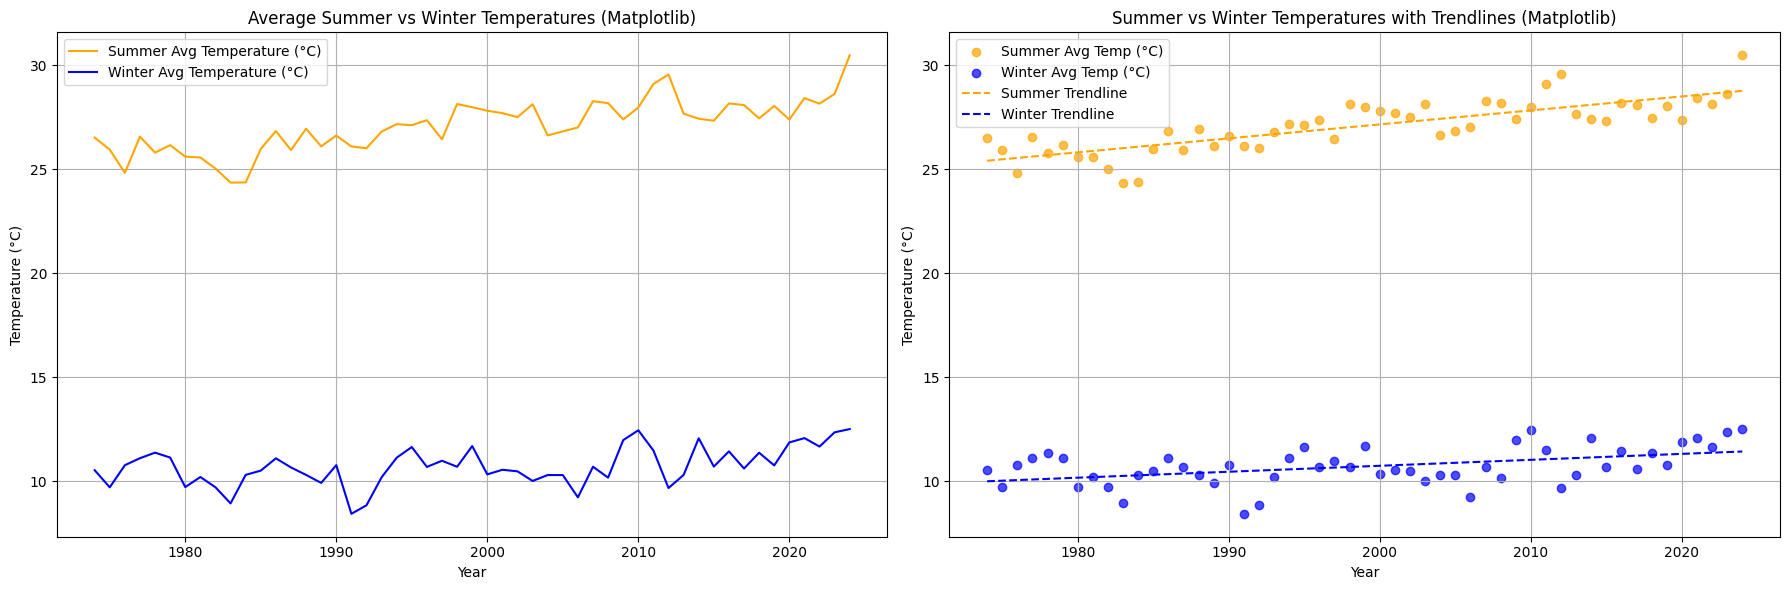

In [6]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group by year and calculate mean temperatures for summers and winters
summer_avg_temp = summer_data.groupby('year')['tavg'].mean()
winter_avg_temp = winter_data.groupby('year')['tavg'].mean()

# --- Matplotlib Plots and Regression --- #
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # Two subplots side by side

# Plot 1: Matplotlib Line Plot for Summer and Winter Temperatures
ax[0].plot(summer_avg_temp.index, summer_avg_temp, label='Summer Avg Temperature (°C)', color='orange')
ax[0].plot(winter_avg_temp.index, winter_avg_temp, label='Winter Avg Temperature (°C)', color='blue')
ax[0].set_title('Average Summer vs Winter Temperatures (Matplotlib)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Temperature (°C)')
ax[0].legend()
ax[0].grid(True)

# Plot 2: Matplotlib Scatter Plot + Regression Lines
ax[1].scatter(summer_avg_temp.index, summer_avg_temp, color='orange', label='Summer Avg Temp (°C)', alpha=0.7)
ax[1].scatter(winter_avg_temp.index, winter_avg_temp, color='blue', label='Winter Avg Temp (°C)', alpha=0.7)

# Add Regression Lines
p_summer = Polynomial.fit(summer_avg_temp.index, summer_avg_temp, 1)  # Linear fit
p_winter = Polynomial.fit(winter_avg_temp.index, winter_avg_temp, 1)

# Plot regression lines
ax[1].plot(summer_avg_temp.index, p_summer(summer_avg_temp.index), color='orange', linestyle='--', label='Summer Trendline')
ax[1].plot(winter_avg_temp.index, p_winter(winter_avg_temp.index), color='blue', linestyle='--', label='Winter Trendline')

ax[1].set_title('Summer vs Winter Temperatures with Trendlines (Matplotlib)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Temperature (°C)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# --- Plotly Interactive Plot --- #
fig = go.Figure()

# Add traces for summer and winter temperatures
fig.add_trace(go.Scatter(x=summer_avg_temp.index, y=summer_avg_temp,
                         mode='lines+markers',
                         name='Summer Avg Temperature (°C)',
                         line=dict(color='orange')))

fig.add_trace(go.Scatter(x=winter_avg_temp.index, y=winter_avg_temp,
                         mode='lines+markers',
                         name='Winter Avg Temperature (°C)',
                         line=dict(color='blue')))

# Customize layout
fig.update_layout(
    title='Average Summer vs Winter Temperatures (Plotly Interactive)',
    xaxis_title='Year',
    yaxis_title='Temperature (°C)',
    hovermode='x unified',
    template='plotly_white'
)

# Show Plotly Interactive Plot
fig.show()

**Plotting Max and Min Temperatures with Regression**

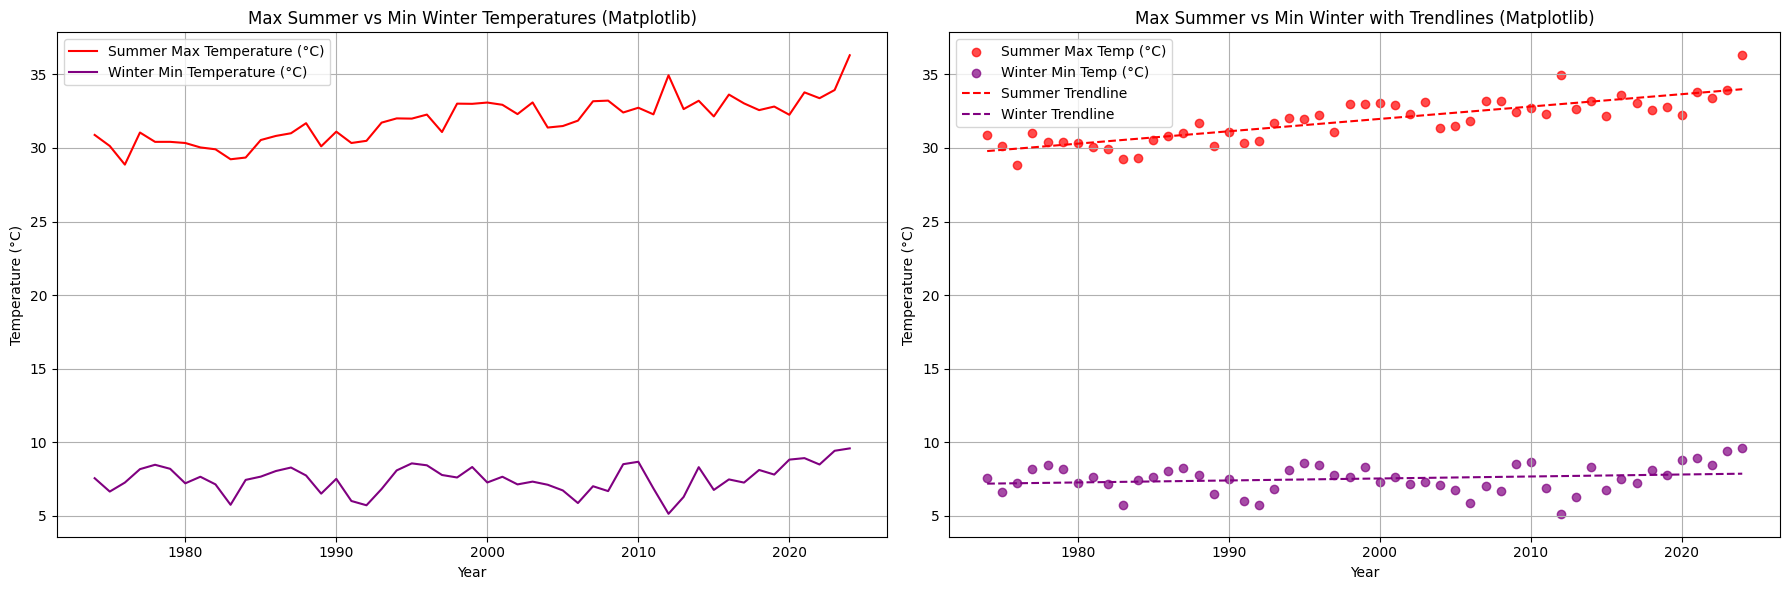

In [7]:
summer_max_temp = summer_data.groupby('year')['tmax'].mean()
winter_min_temp = winter_data.groupby('year')['tmin'].mean()

# --- Matplotlib Plots and Regression --- #
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # Two subplots side by side

# Plot 1: Matplotlib Line Plot for Summer Max and Winter Min Temperatures
ax[0].plot(summer_max_temp.index, summer_max_temp, label='Summer Max Temperature (°C)', color='red')
ax[0].plot(winter_min_temp.index, winter_min_temp, label='Winter Min Temperature (°C)', color='purple')
ax[0].set_title('Max Summer vs Min Winter Temperatures (Matplotlib)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Temperature (°C)')
ax[0].legend()
ax[0].grid(True)

# Plot 2: Matplotlib Scatter Plot + Regression Lines
ax[1].scatter(summer_max_temp.index, summer_max_temp, color='red', label='Summer Max Temp (°C)', alpha=0.7)
ax[1].scatter(winter_min_temp.index, winter_min_temp, color='purple', label='Winter Min Temp (°C)', alpha=0.7)

# Fit Regression Lines
p_summer_max = Polynomial.fit(summer_max_temp.index, summer_max_temp, 1)  # Linear fit
p_winter_min = Polynomial.fit(winter_min_temp.index, winter_min_temp, 1)

# Plot regression lines
ax[1].plot(summer_max_temp.index, p_summer_max(summer_max_temp.index), color='red', linestyle='--', label='Summer Trendline')
ax[1].plot(winter_min_temp.index, p_winter_min(winter_min_temp.index), color='purple', linestyle='--', label='Winter Trendline')

ax[1].set_title('Max Summer vs Min Winter with Trendlines (Matplotlib)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Temperature (°C)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# --- Plotly Interactive Plot --- #
fig = go.Figure()

# Add traces for summer max and winter min temperatures
fig.add_trace(go.Scatter(x=summer_max_temp.index, y=summer_max_temp,
                         mode='lines+markers',
                         name='Summer Max Temp (°C)',
                         line=dict(color='red')))

fig.add_trace(go.Scatter(x=winter_min_temp.index, y=winter_min_temp,
                         mode='lines+markers',
                         name='Winter Min Temp (°C)',
                         line=dict(color='purple')))

# Customize layout
fig.update_layout(
    title='Max Summer vs Min Winter Temperatures (Plotly Interactive)',
    xaxis_title='Year',
    yaxis_title='Temperature (°C)',
    hovermode='x unified',
    template='plotly_white'
)

# Show Plotly Interactive Plot
fig.show()


**precipitation, wind speed**

> Add blockquote



In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define location (e.g., Athens, Greece)
location = met.Point(37.9838, 23.7275)  # Coordinates for Athens

# Set the date range for data collection (e.g., past 44 years)
start_date = datetime(1974, 1, 1)
end_date = datetime(2024, 9, 9)

# Get daily data (temperature, precipitation, etc.)
weather_data = met.Daily(location, start_date, end_date)
weather_data = weather_data.fetch()

# Convert date index to a column
weather_data.reset_index(inplace=True)

# Add a column for the year and month to filter by seasons
weather_data['year'] = weather_data['time'].dt.year
weather_data['month'] = weather_data['time'].dt.month

# Group by year and calculate mean values for all variables
precip_data = weather_data.groupby('year')['prcp'].mean()    # Mean precipitation per year
wind_data = weather_data.groupby('year')['wspd'].mean()      # Mean wind speed per year

# Create a subplot figure with 4 rows for each variable
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Precipitation (mm)", "Wind Speed (km/h)"))

# Plot 1: Precipitation
fig.add_trace(go.Scatter(x=precip_data.index, y=precip_data, mode='lines+markers',
                         name='Precipitation (mm)', line=dict(color='blue')),
              row=1, col=1)

# Plot 2: Wind Speed
fig.add_trace(go.Scatter(x=wind_data.index, y=wind_data, mode='lines+markers',
                         name='Wind Speed (km/h)', line=dict(color='green')),
              row=2, col=1)


# Update layout for the entire figure
fig.update_layout(
    title="Weather Data in Athens (1974-2024)",
    height=1000,  # Adjust the height of the figure for better visibility
    showlegend=False,  # Turn off individual legends for clarity
    hovermode='x unified',  # Show hover data across all plots when hovering on one
    template='plotly_white'
)

# Update the axes labels
fig.update_xaxes(title_text="Year", row=4, col=1)  # Set x-axis title only for the bottom plot
fig.update_yaxes(title_text="Precipitation (mm)", row=1, col=1)
fig.update_yaxes(title_text="Wind Speed (km/h)", row=2, col=1)

# Show the plot
fig.show()

